## Dinheiro em Circulação


Análise feita a partir de registros diários das quantidades de cédulas e moedas em circulação disponibilizada pelo Banco Central do Brasil (não estão incluídas as moedas comemorativas).


As informações estão separadas para cada espécie (cédula ou moeda), família (categoria) e 
denominação do Real (símbolos : R$, BRL).

A documentação da biblioteca está disponível em: <https://dadosabertos.bcb.gov.br/dataset/dinheiro-em-circulao>

### Setup

In [1]:
import requests
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### API

In [3]:
# Obtendo os Registros disponíveis na API do Banco Central:

final_table = pd.DataFrame()
skip = 0

while True:
    link = f"https://olinda.bcb.gov.br/olinda/servico/mecir_dinheiro_em_circulacao/versao/v1/odata/informacoes_diarias?$top=10000&$skip={skip}&$orderby=Data%20desc&$format=json"
    raw_data = requests.get(link)
    data = raw_data.json()
    df = pd.DataFrame(data["value"])
    if data["value"] == []:
        break
    final_table = pd.concat([final_table, df])
    skip += 10000


In [4]:
df = final_table

In [5]:
display(df)

,Data,Quantidade,Valor,Denominacao,Especie
0,2022-11-07,3191087458,3.191087e+07,0.01,Moedas
1,2022-11-07,7507535094,3.753768e+08,0.05,Moedas
2,2022-11-07,7727047404,7.727047e+08,0.10,Moedas
3,2022-11-07,3417922186,8.544805e+08,0.25,Moedas
4,2022-11-07,3466080750,1.733040e+09,0.50,Moedas
...,...,...,...,...,...
8494,1994-10-03,181609358,1.816094e+08,1.00,Moedas
8495,1994-10-03,252922174,1.264611e+09,5.00,Cédulas
8496,1994-10-03,273630983,2.736310e+09,10.00,Cédulas
8497,1994-10-03,28945486,1.447274e+09,50.00,Cédulas


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88499 entries, 0 to 8498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         88499 non-null  object 
 1   Quantidade   88499 non-null  int64  
 2   Valor        88499 non-null  float64
 3   Denominacao  88499 non-null  object 
 4   Especie      88499 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.1+ MB


### Data Cleaning

> Os dados foram previamente tratados pelo Banco Central, por isso não há muita necessidade de tratamento dos mesmos.

In [7]:
# Adequando o formato das datas:

df["Data"] = pd.to_datetime(df["Data"],format="%Y-%m-%d")

In [8]:
# Transformando os Valores em Bilhões: 

df["Valor"] = df["Valor"]/(1e9)

### Data Manipulation

In [9]:
moedas = df["Denominacao"].unique()

In [10]:
# Criando sub-bancos, para poder comparar cada tipo de moeda separadamente:

dfc = {}
for item in moedas:
    # Transformando a informação de cada moeda em um sub-dataset
    dfc[item] = df[df["Denominacao"] == item]
    # Agrupando cada sub-dataset por ano e obtendo as médias
    dfc[item] = dfc[item].groupby(dfc[item]["Data"].dt.year).mean()

In [40]:
# Obtendo os principais valores de "quantidade em circulação" e "valor em circulação" para o ano de 2022:

max_val = {}
for item in moedas:
    max_val[item] = dfc[item].loc[2022]["Valor"]
    
max_quant = {}
for item in moedas:
    max_quant[item] = dfc[item].loc[2022]["Quantidade"]

In [13]:
# Ordenando os valores em ordem decrescente:

max_val_plot = sorted(max_val.items(), key=lambda x:x[1], reverse=True)[0:7]

# Separando os valores em uma variável para plotar:
plot_itens = [max_val_plot[item][0] for item in range(0,len(max_val_plot))]
plot_itens

['100.00', '50.00', '200.00', '20.00', '10.00', '5.00', '2.00']

### Data Visualization

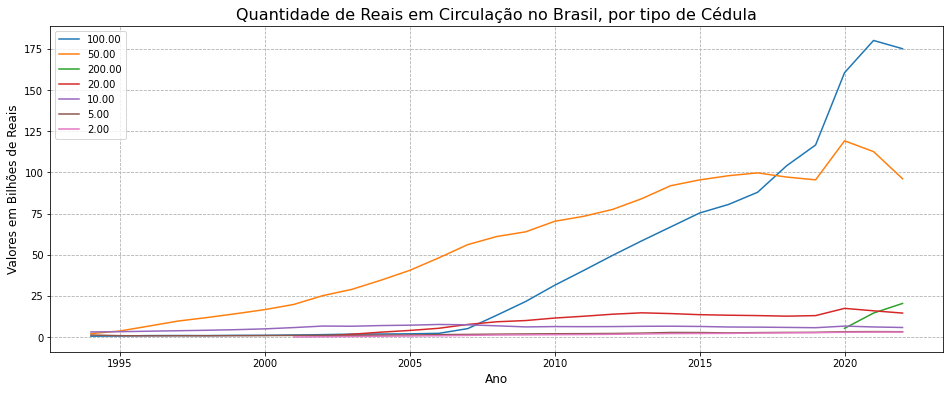

In [25]:
# Fazendo a plotagem dos principais items:

plt.figure(figsize=(16,6))

plt.title("Quantidade de Reais em Circulação no Brasil, por tipo de Cédula", size=16)
plt.ylabel("Valores em Bilhões de Reais", size=12)
plt.xlabel("Ano", size=12)
plt.grid(True, linestyle="--")

for item in plot_itens:
    sns.lineplot(data=dfc[item]['Valor'], label=f"{item}")

Percebemnos que, no Brasil, as principais cédulas em circulação são a de cem (RS 100,00) e cinquenta reais (RS 50,00).

A utilização destas cédulas iniciou seu declínio em 2020, com a introdução da cédula de duzentos reais (RS 200,00).

A cédula de duzentos reais (RS 200,00), apesar de relativamente nova, é a terceira maior cédula em "valor em circulação" e apresenta um forte indicativo de crescimento para os próximos anos.

O crescimento da utilização de cédulas de maior valor é um indicativo/reflexo da crescente inflação no país e no mundo.

In [39]:
# Obtendo os maiores valores em "quantidade em circulação" para o ano de 2022:

sorted(max_quant.items(), key=lambda x:x[1], reverse=True)[:3]

[('0.10', 7633749729.713615),
 ('0.05', 7412050111.830986),
 ('0.50', 3404656665.8685446)]

<AxesSubplot:title={'center':'Quantidade de Cédulas em Circulação no Brasil'}, xlabel='Ano', ylabel='Valores em Bilhões de Unidades'>

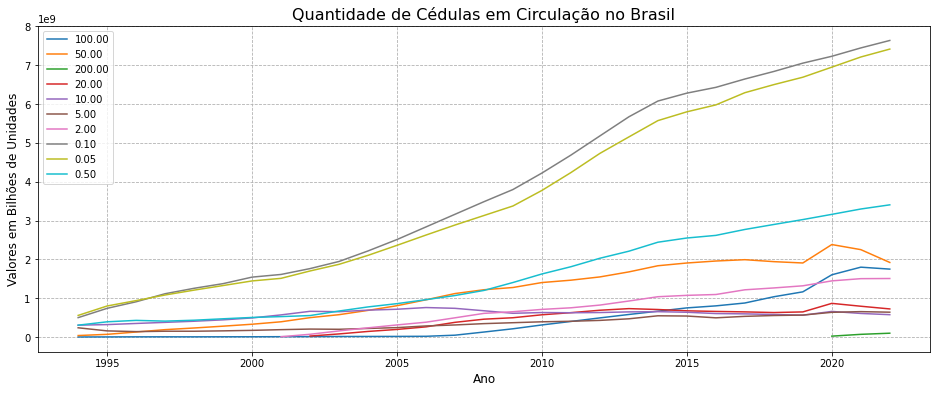

In [33]:
plt.figure(figsize=(16,6))

plt.title("Quantidade de Cédulas em Circulação no Brasil", size=16)
plt.ylabel("Valores em Bilhões de Unidades", size=12)
plt.xlabel("Ano", size=12)
plt.grid(True, linestyle="--")



for item in plot_itens:
    sns.lineplot(data=dfc[item]['Quantidade'], label=f"{item}")

sns.lineplot(data=dfc["0.10"]['Quantidade'], label="0.10")
sns.lineplot(data=dfc["0.05"]['Quantidade'], label="0.05")
sns.lineplot(data=dfc["0.50"]['Quantidade'], label="0.50")

Apesar das cédulas de 100, 50 e 200 reais representarem o maior "valor em circulação", os numerários que mais são comercializados são as moedas de 10, 25 e 50 centavos.

Mesmo hoje, o Banco Central continua fabricando e colocando tais numerários em circulação.

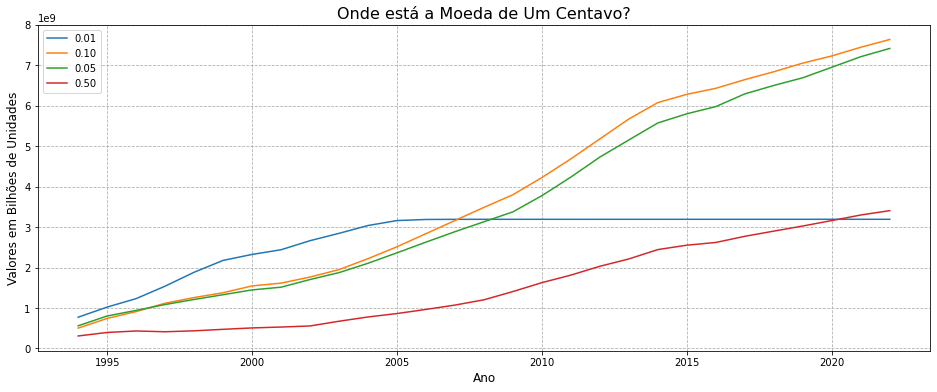

In [37]:
plt.figure(figsize=(16,6))

plt.title("Onde está a Moeda de Um Centavo?", size=16)
plt.ylabel("Valores em Bilhões de Unidades", size=12)
plt.xlabel("Ano", size=12)
plt.grid(True, linestyle="--")

sns.lineplot(data=dfc["0.01"]['Quantidade'], label="0.01")
sns.lineplot(data=dfc["0.10"]['Quantidade'], label="0.10")
sns.lineplot(data=dfc["0.05"]['Quantidade'], label="0.05")
sns.lineplot(data=dfc["0.50"]['Quantidade'], label="0.50");

Pelas informações do gráfico podemos considerar que existem pouco mais de R$ 30.000.000,00 (trinta milhões de reais) 
perdidos pelo Brasil na forma de moedas de um centavo. 

Tais moedas não são colocadas em circulação, nem conseguem ser retiradas de circulação pelo Bacen, desde 2005.

Essa situação indica para a possibilidade de que os valores em circulação apresentados pelo Bacen não representam absolutamente a quantidade de circulação de moedas no país. O desaparecimento de numerários existe, sejam eles cédulas ou moedas, e uma possível explicação para isso é a perda ou a inutilização dos mesmos pela população.
